## Downsample the Headshape in our OPM Data

Opening raw data file BIDS/sub-seamus/ses-001/meg/sub-seamus_ses-001_task-fourMotor_run-001_meg.fif...
    Range : 0 ... 2198783 =      0.000 ...  1465.855 secs
Ready.
Reading 0 ... 2198783  =      0.000 ...  1465.855 secs...
(15099, 3)
Removing Points Below Z_lim


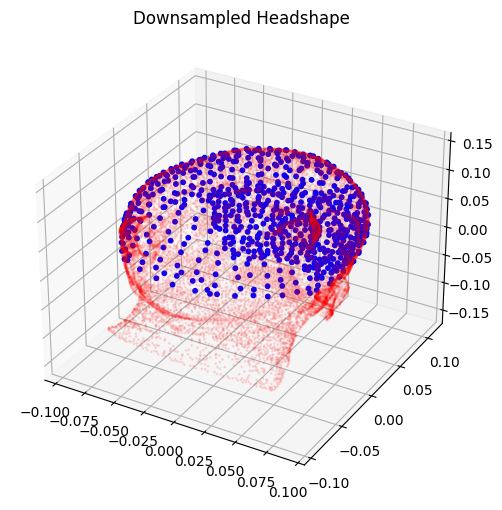

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
Getting helmet for system unknown (derived from 192 MEG channel locations)
Channel types::	mag: 192
Saving...
Overwriting existing file.
Writing /Users/robertseymour/data/20241216_oxford_pilot/BIDS/sub-seamus/ses-001/meg/sub-seamus_ses-001_task-fourMotor_run-001_meg.fif_hs_downsample-raw.fif
Closing /Users/robertseymour/data/20241216_oxford_pilot/BIDS/sub-seamus/ses-001/meg/sub-seamus_ses-001_task-fourMotor_run-001_meg.fif_hs_downsample-raw.fif
[done]


In [7]:
import mne
import osl_ephys
import numpy as np
import matplotlib.pyplot as plt

from osl_ephys.source_recon.rhino.utils import downsample_headshape, replace_headshape

%matplotlib inline

subject = 'seamus'

filename = 'BIDS/sub-{}/ses-001/meg/sub-{}_ses-001_task-fourMotor_run-001_meg.fif'.format(subject,subject)
# filename = 'sub-11766_ses-001_task-facescircles_run-001_meg.fif'
raw = mne.io.read_raw_fif(filename, preload=True)

# Get Headshape Points
dig = raw.info['dig']
points = np.array([d['r'] for d in dig if 'r' in d])
print(np.shape(points))

# Downsample
ds_headshape = downsample_headshape(
    points,
    downsample_amount=0.015,    # average over 1.5cm
    include_facial_info=True,
    remove_zlim=0.02,           # Remove 2cm above nasion
    angle=10,                   # At an angle of 10deg
    method="gridaverage",
    face_Z = [-0.08, 0.02],     # Z-axis (up-down) -8cm to 2cm
    face_Y = [0.06, 0.15],      # Y-axis (forward-back) 6 to 15cm
    face_X = [-0.07, 0.07],     # X-axis (left_right) -7 to 7cm
    downsample_facial_info=True,
    downsample_facial_info_amount=0.008 # average over 0.8cm
)

# Assume `raw` is your loaded MNE Raw object, and `ds_headshape` is the Nx3 array of downsampled points
raw_C = replace_headshape(raw, ds_headshape)

# Plot the sensors to check they are in the right orientation
fig = mne.viz.plot_alignment(raw_C.info,dig=True)

# Save the data
print('Saving...')
raw_C.save('{}_hs_downsample-raw.fif'.format(filename),overwrite=True)
